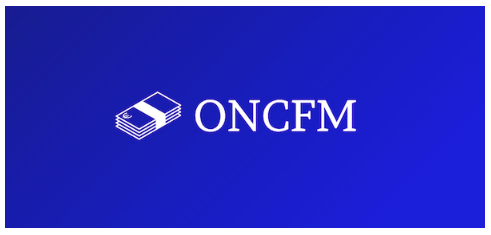

### Contexte:

Dans ce notebook vous trouverez les étapes de pré-traitement, d'application du modèle et de présentation des résultats de l'algorithme d'identification de vrai/faux billets conçu précédemment.

Ces étapes sont compilée dans une *fonction* trouvable à la fin du notebook.

In [1]:
import pandas as pd
import numpy as np

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.linear_model import LogisticRegression

### Import des données à tester:

In [20]:
data_test = pd.read_csv("billets_production.csv")
data_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


### Pré-traitement des données tester:

In [21]:
# on choisi la méthode standard:
scaler = StandardScaler()

# on standardise les données test:
data_test_scaled = scaler.fit_transform(data_test[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]])
data_test_scaled_df = pd.DataFrame(data_test_scaled, index=data_test.index, columns=data_test.drop(columns="id").columns)
data_test_scaled_df

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.664228,-0.502224,-1.228900,0.438224,0.485681,-1.124014
1,-0.287604,-0.050787,0.449459,1.493702,0.564017,-0.289103
2,0.157497,1.106022,0.904607,0.144293,1.190702,-0.937094
3,1.835186,1.021377,1.046841,-0.590533,-1.629382,1.094107
4,-1.040852,-1.574388,-1.172007,-1.485686,-0.611018,1.256104


### Import du modèle:

In [22]:
model = pickle.load(open("RegLog_Model.pkl", "rb"))

### Application du modèle:

In [25]:
# on récupère les prédictions:
data_test_pred = Binarizer(threshold = 0.734).transform(model.predict_proba(data_test_scaled_df))[:,1]
data_test_prob = model.predict_proba(data_test_scaled_df)
data_test_prob = pd.DataFrame(data_test_prob)

# on récupère les prédictions du modèle:
data_test["is_genuine"] = data_test_pred
data_test["is_genuine"] = data_test["is_genuine"].astype("bool")
data_test["proba_vrai(%)"] = round(data_test_prob[1]*100,2)

data_test
# print(data_prod[["id", "is_genuine", "proba_vrai(%)"]])

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine,proba_vrai(%)
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,5.50
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,1.68
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.90
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,99.98
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,100.00


### Résultats:

In [36]:
for i, j, k in zip(data_test["id"], data_test["is_genuine"], data_test["proba_vrai(%)"]):
    if j == False:
        print("Le billet","{}".format(i),"est FAUX (Probabilité =", 100-k ,"%).")
    else:
        print("Le billet","{}".format(i),"est VRAI (Probabilité =", k ,"%).")

Le billet A_1 est FAUX (Probabilité = 94.5 %).
Le billet A_2 est FAUX (Probabilité = 98.32 %).
Le billet A_3 est FAUX (Probabilité = 99.1 %).
Le billet A_4 est VRAI (Probabilité = 99.98 %).
Le billet A_5 est VRAI (Probabilité = 100.0 %).


### Fonction:

In [8]:
def Identification_billets(fichier):
    
    # import du fichier:
    data_test = pd.read_csv(fichier)
    
    # on choisi la méthode standard:
    scaler = StandardScaler()

    # on standardise les données test:
    data_test_scaled = scaler.fit_transform(data_test[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]])
    data_test_scaled_df = pd.DataFrame(data_test_scaled, index=data_test.index, columns=data_test.drop(columns="id").columns)
    
    # import du modèle:
    model = pickle.load(open("RegLog_Model.pkl", "rb"))
    
    # on récupère les prédictions:
    data_test_pred = Binarizer(threshold = 0.734).transform(model.predict_proba(data_test_scaled_df))[:,1]
    data_test_prob = model.predict_proba(data_test_scaled_df)
    data_test_prob = pd.DataFrame(data_test_prob)

    # on récupère les prédictions du modèle:
    data_test["is_genuine"] = data_test_pred
    data_test["is_genuine"] = data_test["is_genuine"].astype("bool")
    data_test["proba_vrai(%)"] = round(data_test_prob[1]*100,2)
    
    # sorti des résultats:
    for i, j, k in zip(data_test["id"], data_test["is_genuine"], data_test["proba_vrai(%)"]):
        if j == False:
            print("Le billet","{}".format(i),"est FAUX (Probabilité =", k ,"%).")
        else:
            print("Le billet","{}".format(i),"est VRAI (Probabilité =", k ,"%).")  

In [7]:
Identification_billets("billets_test.csv")

Le billet B_1 est VRAI (Probabilité = 99.99 %).
Le billet B_2 est FAUX (Probabilité = 11.19 %).
Le billet B_3 est VRAI (Probabilité = 100.0 %).
Le billet B_4 est FAUX (Probabilité = 0.03 %).
Le billet B_5 est FAUX (Probabilité = 37.42 %).
